In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os 

[Kaggle Dataset](https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images)

In [128]:
def get_dataset(path, label):
    x = []
    y = []
    for file in os.listdir(path):
        image_ND = imread(path+file)

        # Caracteristicas Conjunto de Entrenamiento
#         x+=[[np.mean(image_ND), np.std(image_ND), 
#              np.max(image_ND), np.min(image_ND),
#              np.median(image_ND), np.quantile(image_ND, 0.3)]]

        x_array = image_ND.reshape(image_ND.shape[0]*image_ND.shape[1]) - np.mean(image_ND)
        x.append(x_array)
        y.append(label)
    return np.array(x), np.array(y)

In [129]:
x_train, y_train = get_dataset('./data/alzheimer/train/NonDemented/', label=0)

In [189]:
x_test_0, y_test_0 = get_dataset('./data/alzheimer/test/NonDemented/', label=0)
x_test_1, y_test_1 = get_dataset('./data/alzheimer/test/ModerateDemented/', label=1)
x_test_2, y_test_2 = get_dataset('./data/alzheimer/test/MildDemented/', label=1)
x_test = np.concatenate([x_test_0, x_test_1, x_test_2])
y_test = np.concatenate([y_test_0, y_test_1, y_test_2])

In [190]:
from sklearn.decomposition import PCA

In [191]:
pca = PCA(n_components=100)
pca = pca.fit(np.concatenate([x_train, x_test]))

In [192]:
x_train_reduced = pca.transform(x_train)
x_test_reduced = pca.transform(x_test)

In [193]:
np.sum(pca.explained_variance_ratio_)

0.7347176429403492

In [194]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

In [195]:
gmm = GaussianMixture(n_components=100, covariance_type="tied")
gmm = gmm.fit(x_train_reduced)
scores = gmm.score_samples(x_test_reduced)

In [196]:
kde = KernelDensity(kernel='gaussian',bandwidth = 1e-2)
kde = kde.fit(x_train)
scores = kde.score_samples(x_test)

In [197]:
scores_D = scores[np.array(y_test) == 1]
scores_ND = scores[np.array(y_test) == 0]

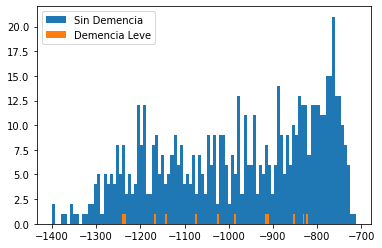

In [188]:
plt.hist(scores_ND, density=False, bins=100, label='Sin Demencia')
plt.hist(scores_D, density=False, bins=100, label='Demencia Leve')
plt.legend()
plt.show()